<a href="https://colab.research.google.com/github/Ge0f3/tensorflow_certification/blob/main/Text_Classification_with_Tesorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)


1.13.1


In [ ]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [ ]:
print(train_data[[2]].shape)
print(train_labels[[0]].shape)

(1,)
(1,)


In [ ]:
#Convering integer back to words

# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
print(decode_review(test_data[1]))
print(test_labels[1])

<START> this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances <UNK> the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere <UNK> with sexual tension and psychological <UNK> it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the <UNK> moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual <UNK> and desperation be patient <UNK> up t

In [ ]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [ ]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]
print(partial_y_train[3])

0


In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)


Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 1s 88us/sample - loss: 0.6921 - acc: 0.5174 - val_loss: 0.6903 - val_acc: 0.6321
Epoch 2/40
15000/15000 [==============================] - 1s 56us/sample - loss: 0.6870 - acc: 0.7333 - val_loss: 0.6833 - val_acc: 0.7181
Epoch 3/40
15000/15000 [==============================] - 1s 56us/sample - loss: 0.6751 - acc: 0.7380 - val_loss: 0.6670 - val_acc: 0.7557
Epoch 4/40
15000/15000 [==============================] - 1s 54us/sample - loss: 0.6521 - acc: 0.7617 - val_loss: 0.6409 - val_acc: 0.7619
Epoch 5/40
15000/15000 [==============================] - 1s 52us/sample - loss: 0.6183 - acc: 0.7915 - val_loss: 0.6055 - val_acc: 0.7857
Epoch 6/40
15000/15000 [==============================] - 1s 54us/sample - loss: 0.5743 - acc: 0.8130 - val_loss: 0.5623 - val_acc: 0.8033
Epoch 7/40
15000/15000 [==============================] - 1s 54us/sa

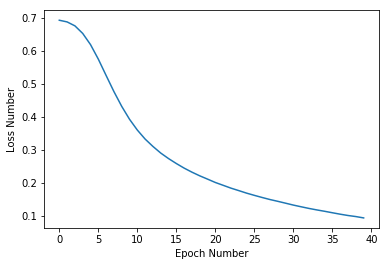

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel('Loss Number')
plt.plot(history.history['loss'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


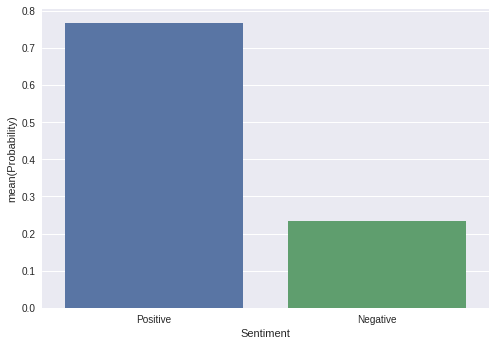

In [ ]:

user_input = 'This is the good movie'
word_index = imdb.get_word_index()
x_test = [[word_index[w] for w in user_input if w in word_index]]
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=256) # Should be same which you used for training data

vector = np.array([x_test.flatten()])

# print(model.predict(vector))
prediction = model.predict(vector)
if(prediction<0.70):
  #print("The probability of the review being negtive is {}\nThe probability of the review being positive is {}".format(model.predict(vector),1-model.predict(vector)))
  data = [['Positive', 1-prediction[0][0]] , ['Negative', prediction[0][0]] ]
  df = pd.DataFrame(data, columns = ['Sentiment', 'Probability'])
  #display(df)
  sns.barplot(x="Sentiment", y="Probability", data=df)
else:
  #print("The probability of the review being positive is {}\nThe probability of the review being negative is {}".format(model.predict(vector),1-model.predict(vector)))
  data = [['Positive', prediction[0][0]] , ['Negative', 1-prediction[0][0]] ] 
  df = pd.DataFrame(data, columns = ['Sentiment', 'Probability'])
  #display(df)
  sns.barplot(x="Sentiment", y="Probability", data=df)

In [ ]:
x_test

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:


import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# print(test_data[0])
# print(x_test)